In [ ]:
import pandas as pd


df = pd.read_csv("/content/경기도 수원시_주정차위반단속위치현황_20231201.csv", encoding='cp949' )
df.head(5)

,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
0,2022,수원시,권선구청,2022-01-01 00:33:00,권선동 1124,국민신문고,2023-12-01
1,2022,수원시,장안구청,2022-01-01 08:11:00,하광교동 광교주차장입구,고정형,2023-12-01
2,2022,수원시,권선구청,2022-01-01 08:48:00,세류동 1159-2,국민신문고,2023-12-01
3,2022,수원시,권선구청,2022-01-01 08:57:00,구운동 583,국민신문고,2023-12-01
4,2022,수원시,장안구청,2022-01-01 09:00:00,영화동 장안문거북시장,고정형,2023-12-01


In [ ]:
# Colab에 나눔 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv

# 런타임 재시작 후 실행
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped d

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 'NanumGothic' 폰트 경로 자동 탐색
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
nanum_fonts = [f for f in font_path if 'NanumGothic' in f]

if nanum_fonts:
    fm.fontManager.addfont(nanum_fonts[0])
    plt.rcParams['font.family'] = 'NanumGothic'
    print(f"✅ NanumGothic 폰트 설정 완료: {nanum_fonts[0]}")
else:
    print("❌ NanumGothic 폰트를 찾을 수 없습니다.")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설치 (Colab 기준)
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# 설치된 폰트 위치 찾기 (예: Nanum 폰트)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 프로퍼티 생성
fontprop = fm.FontProperties(fname=path, size=12)

# matplotlib에 폰트 설정
plt.rc('font', family=fontprop.get_name())

# 이제 그래프 그리면 한글 깨짐 없이 표시됩니다.


In [ ]:
import pandas as pd

# 고유 구청 이름 추출
unique_gu_names = df['관리기관명'].unique()

# 새 DataFrame 생성
gu_df = pd.DataFrame({'관리기관명': unique_gu_names})

# 출력
print(gu_df)


  관리기관명
0  권선구청
1  장안구청
2  영통구청
3  팔달구청


In [ ]:
cond1 = df['관리기관명']=='권선구청'
df1 = df[cond1]
df1.head()

,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
0,2022,수원시,권선구청,2022-01-01 00:33:00,권선동 1124,국민신문고,2023-12-01
2,2022,수원시,권선구청,2022-01-01 08:48:00,세류동 1159-2,국민신문고,2023-12-01
3,2022,수원시,권선구청,2022-01-01 08:57:00,구운동 583,국민신문고,2023-12-01
5,2022,수원시,권선구청,2022-01-01 09:01:00,권선동 청학골프클럽,고정형,2023-12-01
6,2022,수원시,권선구청,2022-01-01 09:01:00,금곡동 리치빌딩 앞,고정형,2023-12-01


In [ ]:
df1['행정동']=df1['단속장소'].str.extract(r'(\S+동)')
df1.head()

/tmp/ipython-input-21-1057994750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['행정동']=df1['단속장소'].str.extract(r'(\S+동)')


,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자,행정동
0,2022,수원시,권선구청,2022-01-01 00:33:00,권선동 1124,국민신문고,2023-12-01,권선동
2,2022,수원시,권선구청,2022-01-01 08:48:00,세류동 1159-2,국민신문고,2023-12-01,세류동
3,2022,수원시,권선구청,2022-01-01 08:57:00,구운동 583,국민신문고,2023-12-01,구운동
5,2022,수원시,권선구청,2022-01-01 09:01:00,권선동 청학골프클럽,고정형,2023-12-01,권선동
6,2022,수원시,권선구청,2022-01-01 09:01:00,금곡동 리치빌딩 앞,고정형,2023-12-01,금곡동


In [ ]:
df1['행정동'].value_counts()

,count
행정동,
권선동,38954
곡반정동,32201
금곡동,28136
호매실동,20708
세류동,19942
서둔동,17014
고색동,14656
구운동,12288
탑동,11475


In [ ]:
#카운트수 조정필요

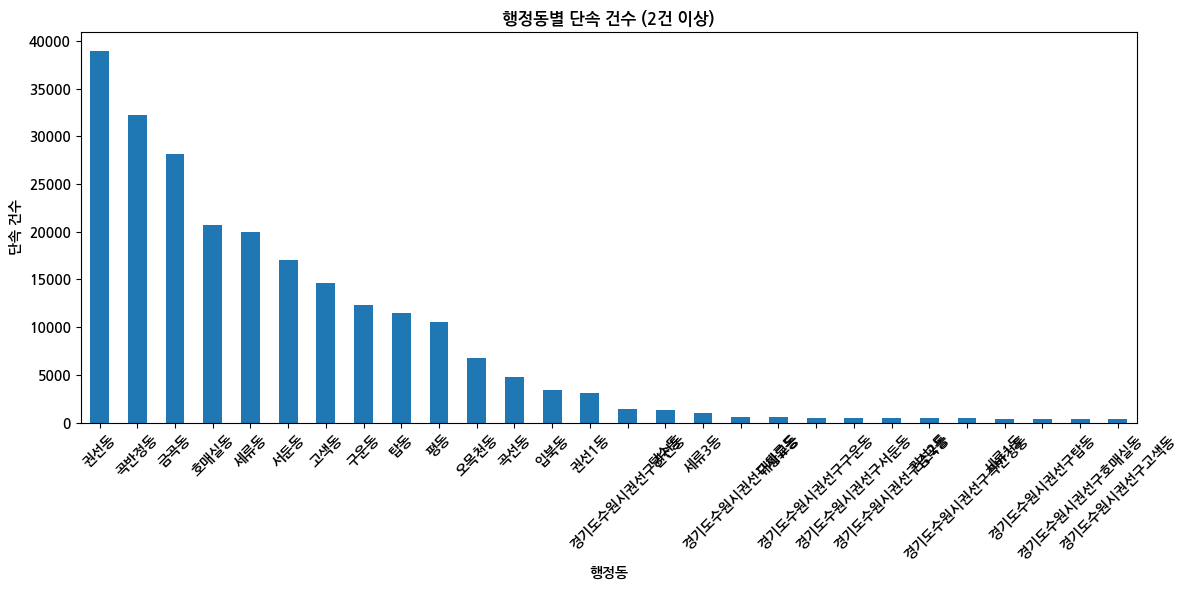

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 행정동별 등장 횟수 계산
counts = df1['행정동'].value_counts()

# 300건 이상만 필터링
filtered_counts = counts[counts > 300]

# 시각화
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')

plt.title("행정동별 단속 건수 (2건 이상)")
plt.xlabel("행정동")
plt.ylabel("단속 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
cond2 = df['관리기관명']=='장안구청'
df2 = df[cond2]
df2.head()


,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
1,2022,수원시,장안구청,2022-01-01 08:11:00,하광교동 광교주차장입구,고정형,2023-12-01
4,2022,수원시,장안구청,2022-01-01 09:00:00,영화동 장안문거북시장,고정형,2023-12-01
7,2022,수원시,장안구청,2022-01-01 09:01:00,하광교동 광교주차장입구,고정형,2023-12-01
19,2022,수원시,장안구청,2022-01-01 09:04:00,영화동 방화2교 앞,고정형,2023-12-01
36,2022,수원시,장안구청,2022-01-01 09:12:00,영화동 장안문거북시장,고정형,2023-12-01


In [ ]:
df2['행정동']=df2['단속장소'].str.extract(r'(\S+동)')
df2.head()


/tmp/ipython-input-35-693380405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['행정동']=df2['단속장소'].str.extract(r'(\S+동)')


,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자,행정동
1,2022,수원시,장안구청,2022-01-01 08:11:00,하광교동 광교주차장입구,고정형,2023-12-01,하광교동
4,2022,수원시,장안구청,2022-01-01 09:00:00,영화동 장안문거북시장,고정형,2023-12-01,영화동
7,2022,수원시,장안구청,2022-01-01 09:01:00,하광교동 광교주차장입구,고정형,2023-12-01,하광교동
19,2022,수원시,장안구청,2022-01-01 09:04:00,영화동 방화2교 앞,고정형,2023-12-01,영화동
36,2022,수원시,장안구청,2022-01-01 09:12:00,영화동 장안문거북시장,고정형,2023-12-01,영화동


In [ ]:
df2['행정동'].value_counts()

,count
행정동,
영화동,14582
정자동,12785
조원동,12731
송죽동,12553
천천동,12063
연무동,10210
율전동,8349
파장동,7661
율천동,2095


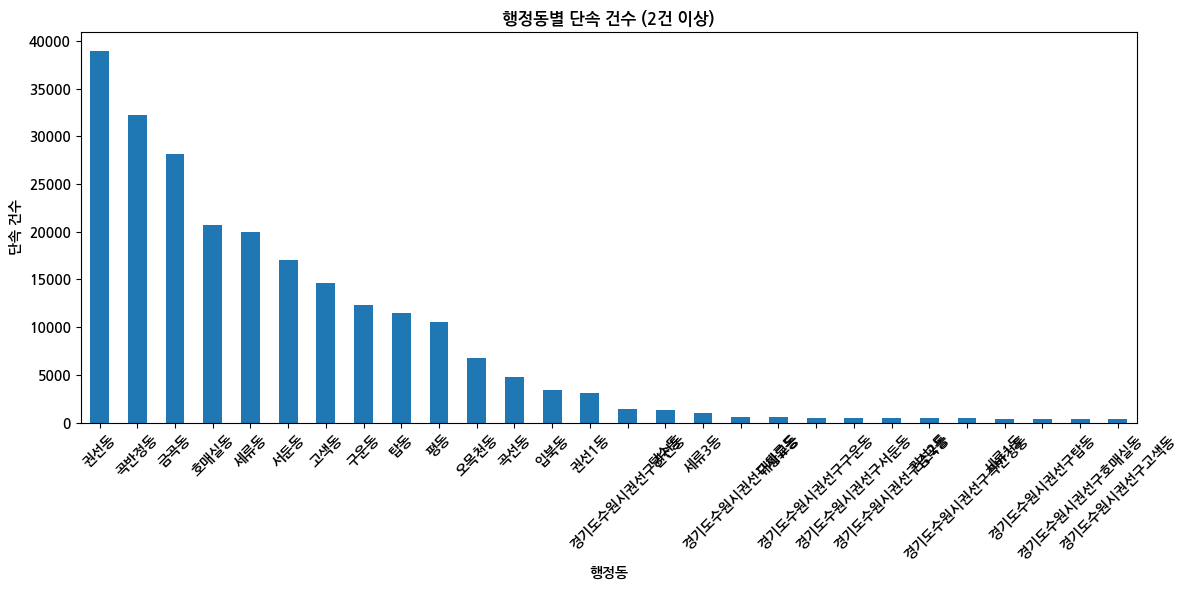

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 행정동별 등장 횟수 계산
counts = df1['행정동'].value_counts()

# 300건 이상만 필터링
filtered_counts = counts[counts > 300]

# 시각화
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')

plt.title("행정동별 단속 건수 (2건 이상)")
plt.xlabel("행정동")
plt.ylabel("단속 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
cond3 = df['관리기관명']=='영통구청'
df3 = df[cond3]
df3.head()

,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
9,2022,수원시,영통구청,2022-01-01 09:02:00,매탄동 매탄3동행정복지센터 앞,고정형,2023-12-01
13,2022,수원시,영통구청,2022-01-01 09:03:00,매탄4동 세화사거리,고정형,2023-12-01
14,2022,수원시,영통구청,2022-01-01 09:03:00,망포동 힐스테이트 119동 ~방죽공원 삼거리,고정형,2023-12-01
15,2022,수원시,영통구청,2022-01-01 09:03:00,매탄동 삼성2차아파트 정문 앞,고정형,2023-12-01
22,2022,수원시,영통구청,2022-01-01 09:04:00,망포동 힐스테이트 119동 ~방죽공원 삼거리,고정형,2023-12-01


In [ ]:
df3['행정동']=df3['단속장소'].str.extract(r'(\S+동)')
df3.head()


/tmp/ipython-input-41-2237279497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['행정동']=df3['단속장소'].str.extract(r'(\S+동)')


,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자,행정동
9,2022,수원시,영통구청,2022-01-01 09:02:00,매탄동 매탄3동행정복지센터 앞,고정형,2023-12-01,매탄동
13,2022,수원시,영통구청,2022-01-01 09:03:00,매탄4동 세화사거리,고정형,2023-12-01,매탄4동
14,2022,수원시,영통구청,2022-01-01 09:03:00,망포동 힐스테이트 119동 ~방죽공원 삼거리,고정형,2023-12-01,망포동
15,2022,수원시,영통구청,2022-01-01 09:03:00,매탄동 삼성2차아파트 정문 앞,고정형,2023-12-01,매탄동
22,2022,수원시,영통구청,2022-01-01 09:04:00,망포동 힐스테이트 119동 ~방죽공원 삼거리,고정형,2023-12-01,망포동


In [ ]:
df3['행정동'].value_counts()

,count
행정동,
매탄동,39378
영통동,32617
이의동,29520
원천동,22533
망포동,17123
신동,13500
하동,11218
영통2동,5056
광교동,4848


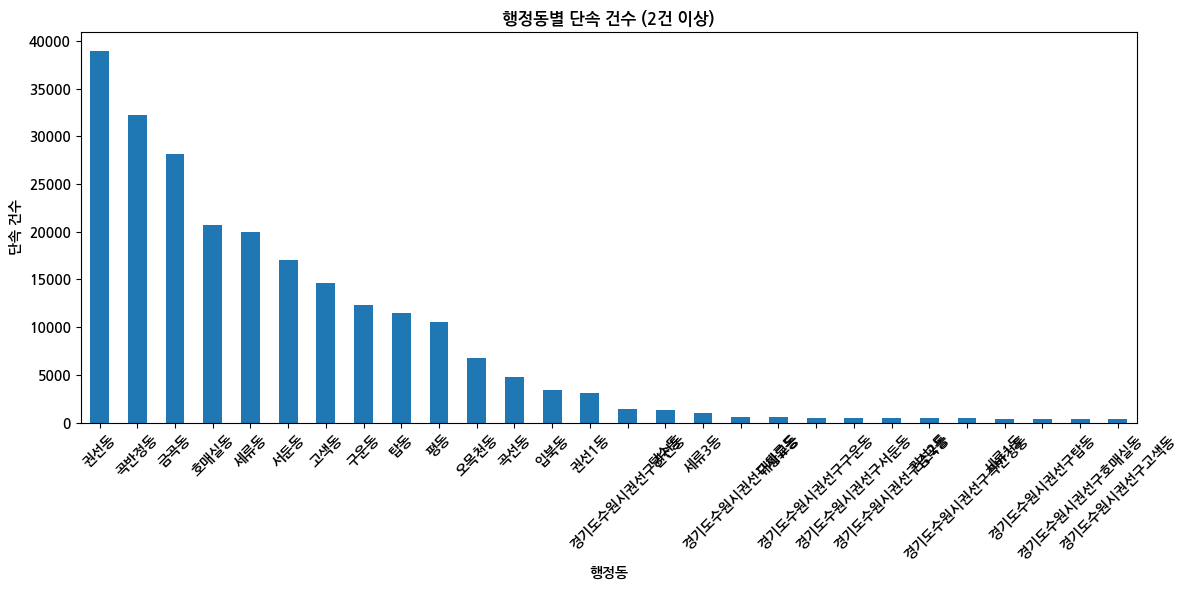

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 행정동별 등장 횟수 계산
counts = df1['행정동'].value_counts()

# 300건 이상만 필터링
filtered_counts = counts[counts > 300]

# 시각화
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')

plt.title("행정동별 단속 건수 (2건 이상)")
plt.xlabel("행정동")
plt.ylabel("단속 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
cond4 = df['관리기관명']=='팔달구청'
df4 = df[cond4]
df4.head()

,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자
10,2022,수원시,팔달구청,2022-01-01 09:02:00,화서1동 푸르지오자이 북문 CU 앞 횡단보도,고정형,2023-12-01
11,2022,수원시,팔달구청,2022-01-01 09:02:00,매향동 연무대,고정형,2023-12-01
17,2022,수원시,팔달구청,2022-01-01 09:03:00,행궁동 팔달문관광안내소,고정형,2023-12-01
23,2022,수원시,팔달구청,2022-01-01 09:04:00,매산동 팅스몰 주차장 출구 옆,고정형,2023-12-01
24,2022,수원시,팔달구청,2022-01-01 09:04:00,매산동 팅스몰 주차장 출구 옆,고정형,2023-12-01


In [ ]:
df4['행정동']=df4['단속장소'].str.extract(r'(\S+동)')
df4.head()


/tmp/ipython-input-45-2271587527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['행정동']=df4['단속장소'].str.extract(r'(\S+동)')


,집계년도,시군명,관리기관명,단속일시정보,단속장소,단속방법,데이터기준일자,행정동
10,2022,수원시,팔달구청,2022-01-01 09:02:00,화서1동 푸르지오자이 북문 CU 앞 횡단보도,고정형,2023-12-01,화서1동
11,2022,수원시,팔달구청,2022-01-01 09:02:00,매향동 연무대,고정형,2023-12-01,매향동
17,2022,수원시,팔달구청,2022-01-01 09:03:00,행궁동 팔달문관광안내소,고정형,2023-12-01,행궁동
23,2022,수원시,팔달구청,2022-01-01 09:04:00,매산동 팅스몰 주차장 출구 옆,고정형,2023-12-01,매산동
24,2022,수원시,팔달구청,2022-01-01 09:04:00,매산동 팅스몰 주차장 출구 옆,고정형,2023-12-01,매산동


In [ ]:
df4['행정동'].value_counts()

,count
행정동,
인계동,155941
매산동,18820
고등동,9814
우만동,8030
화서동,7741
화서1동,6914
지동,5645
경기도수원시팔달구인계동,5185
우만1동,4748


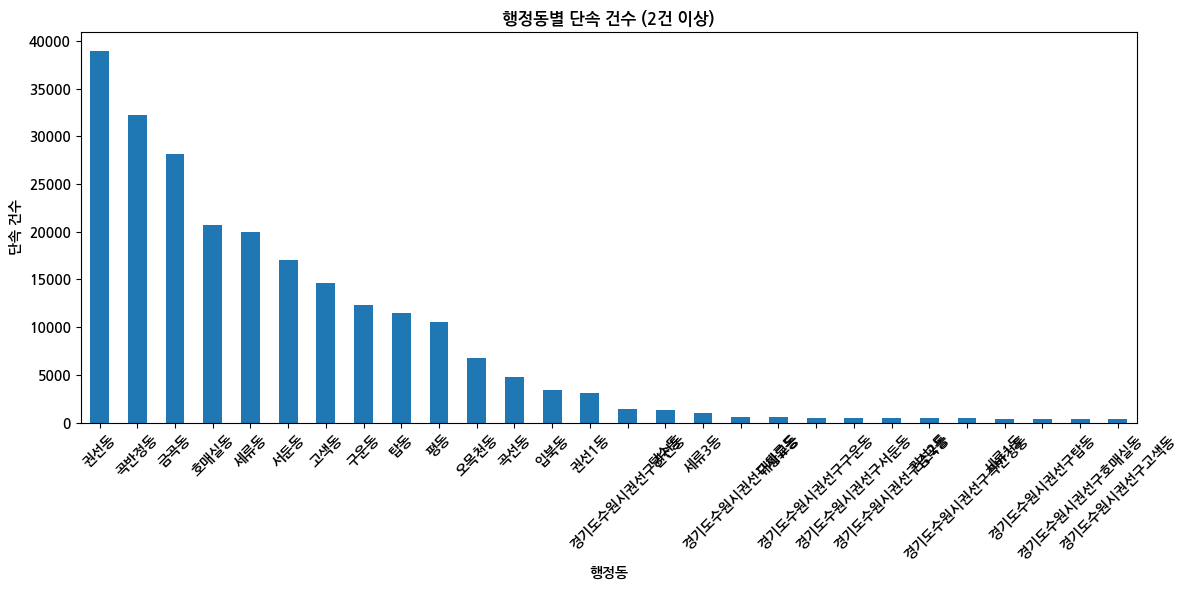

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 행정동별 등장 횟수 계산
counts = df1['행정동'].value_counts()

# 300건 이상만 필터링
filtered_counts = counts[counts > 300]

# 시각화
plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')

plt.title("행정동별 단속 건수 (2건 이상)")
plt.xlabel("행정동")
plt.ylabel("단속 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
